Load the required libraries. `svd` is a base function, so does not require a specific library. For the others, this is good practice: require the libraries, which returns FALSE if the library cannot be loaded (because it is not installed), in which case we install.

In [21]:
if (!require("pixmap")) {
    install.packages("pixmap")
}
if (!require("bmp")) {
    install.packages("bmp")
}

Now load the image using `read.bmp` (from the `bmp` library).

In [22]:
my_image = read.bmp("Julien_and_friend_1000x800.bmp")
dim(my_image)

[1]  800 1000    3

Warning message in rep(cellres, length = 2):
“'x' is NULL so the result will be NULL”


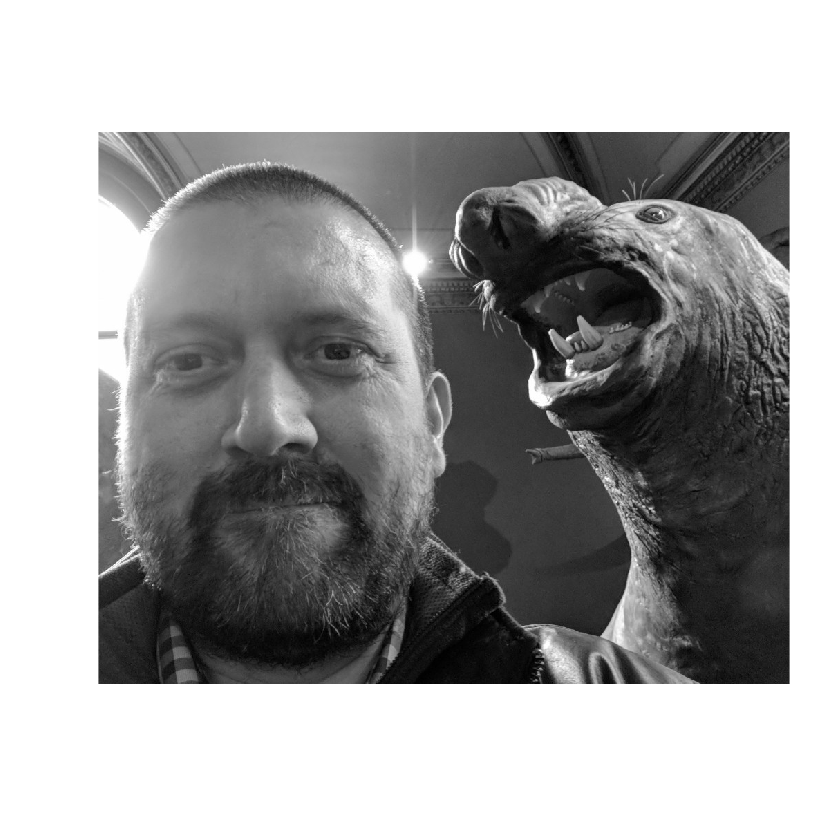

In [23]:
my_image_g = pixmapGrey(my_image)
plot(my_image_g)

In [24]:
my_image_g

Pixmap image
  Type          : pixmapGrey 
  Size          : 800x1000 
  Resolution    : 1x1 
  Bounding box  : 0 0 1000 800 


In [26]:
M = my_image_g@grey
M

0.5882353,0.6039216,0.6392157,0.7137255,0.8000000,0.8627451,0.8745098,0.8588235,0.8274510,0.7686275,⋯,0.2392157,0.2549020,0.2470588,0.2392157,0.2549020,0.2313725,0.2470588,0.2313725,0.2392157,0.2274510
0.5921569,0.5843137,0.5921569,0.6392157,0.7176471,0.7960784,0.8509804,0.8705882,0.8392157,0.7882353,⋯,0.2431373,0.2666667,0.2509804,0.2117647,0.2039216,0.2274510,0.2549020,0.2352941,0.2313725,0.2392157
0.5921569,0.5882353,0.5882353,0.5921569,0.6078431,0.6705882,0.7725490,0.8627451,0.8705882,0.8431373,⋯,0.2784314,0.2666667,0.2588235,0.2117647,0.1843137,0.2274510,0.2549020,0.2588235,0.2470588,0.2549020
0.5882353,0.5921569,0.6000000,0.5960784,0.5803922,0.5960784,0.6784314,0.7607843,0.8392157,0.8705882,⋯,0.2784314,0.2549020,0.2431373,0.2313725,0.1960784,0.2117647,0.2196078,0.2627451,0.2549020,0.2509804
0.6274510,0.6000000,0.5882353,0.5960784,0.6039216,0.6000000,0.6117647,0.6313725,0.7294118,0.8196078,⋯,0.2313725,0.2274510,0.2235294,0.2235294,0.2000000,0.2039216,0.1921569,0.2274510,0.2352941,0.2509804
0.7254902,0.6784314,0.6274510,0.6000000,0.5882353,0.5843137,0.5882353,0.6000000,0.6392157,0.7372549,⋯,0.2196078,0.2156863,0.2313725,0.2196078,0.2156863,0.2352941,0.2196078,0.2078431,0.2274510,0.2745098
0.7921569,0.7725490,0.7294118,0.6745098,0.6235294,0.5960784,0.5960784,0.6039216,0.6039216,0.6588235,⋯,0.2313725,0.2313725,0.2392157,0.2235294,0.2392157,0.2549020,0.2549020,0.2196078,0.2313725,0.2627451
0.7921569,0.8039216,0.8000000,0.7764706,0.7333333,0.6745098,0.6156863,0.5686275,0.5843137,0.5921569,⋯,0.2235294,0.2509804,0.2196078,0.2274510,0.2509804,0.2352941,0.2470588,0.2235294,0.2274510,0.2078431
0.7254902,0.7647059,0.8078431,0.8078431,0.7882353,0.7725490,0.7137255,0.6313725,0.6156863,0.6000000,⋯,0.2000000,0.2392157,0.2313725,0.2588235,0.2705882,0.2627451,0.2549020,0.2352941,0.2235294,0.2352941
0.6901961,0.7019608,0.7372549,0.7686275,0.7843137,0.7921569,0.7803922,0.7450980,0.6980392,0.6549020,⋯,0.2039216,0.2196078,0.2470588,0.2705882,0.2745098,0.2588235,0.2392157,0.2196078,0.2313725,0.2666667
0.7098039,0.6823529,0.6901961,0.7254902,0.7450980,0.7686275,0.7921569,0.8078431,0.7803922,0.7372549,⋯,0.2039216,0.2039216,0.2588235,0.2862745,0.2901961,0.2627451,0.2392157,0.2274510,0.2588235,0.3137255


## First, do things the proper way

Reminder, here is the algorithm in the case of distinct $A^TA$ eigenvalues. If all eigenvalues of $A^TA$ are distinct, we can use the Theorem that states that eigenvectors of symmetrice matrices are orthogonal. Proceed as follows.

- Compute $A^TA\in\mathcal{M}_n$
- Compute eigenvalues $\lambda_1,\ldots,\lambda_n$ of $A^TA$; order them as $\lambda_1>\cdots>\lambda_n\geq 0$ ($>$ not $\geq$ since $\neq$)
- Compute singular values $\sigma_1=\sqrt{\lambda_1},\ldots,\sigma_n=\sqrt{\lambda_n}$
- Diagonal matrix $D$ in $\Sigma$ is either in $\mathcal{M}_n$ (if $\sigma_n>0$) or in $\mathcal{M}_{n-1}$ (if $\sigma_n=0$)
- Since eigenvalues are distinct, the Theorem mentioned above $\implies$ eigenvectors are orthogonal set. Compute these eigenvectors in the same order as the eigenvalues
- Normalise them and use them to make the matrix $V$, i.e., $V=[\mathbf{v}_1\cdots\mathbf{v}_n]$
- To find the $\mathbf{u}_i$, compute, for $i=1,\ldots,r$,
$$
\mathbf{u}_i = \frac{1}{\sigma_i}A\mathbf{v}_i
$$
and ensure that $\|\mathbf{u}_i\|=1$.

So let us compute the eigenvalues of $M^TM$ (here).

In [28]:
MTM = t(M) %*% M
ev = eigen(MTM)
ev$values

[1]  1.188370e+05  5.898569e+03  3.465856e+03  1.983764e+03  1.349587e+03
   [6]  8.243407e+02  7.424852e+02  6.019540e+02  5.814532e+02  4.363734e+02
  [11]  3.845479e+02  3.084446e+02  2.526350e+02  2.138751e+02  1.935523e+02
  [16]  1.833173e+02  1.655590e+02  1.616354e+02  1.419839e+02  1.242424e+02
  [21]  1.172869e+02  1.135369e+02  1.095863e+02  9.724134e+01  9.312287e+01
  [26]  8.249875e+01  7.503730e+01  6.882012e+01  6.644972e+01  6.298025e+01
  [31]  5.716940e+01  5.425438e+01  5.168174e+01  5.028439e+01  4.837563e+01
  [36]  4.577341e+01  4.281205e+01  4.065515e+01  3.905411e+01  3.627777e+01
  [41]  3.388917e+01  3.327462e+01  3.290890e+01  3.133148e+01  2.975323e+01
  [46]  2.844520e+01  2.726387e+01  2.671326e+01  2.571921e+01  2.435378e+01
  [51]  2.374728e+01  2.343759e+01  2.330148e+01  2.185382e+01  2.144766e+01
  [56]  2.129071e+01  1.982712e+01  1.924712e+01  1.838271e+01  1.807134e+01
  [61]  1.769789e+01  1.719145e+01  1.689089e+01  1.641446e+01  1.609118e+01
  [66]  1.573707e+01  1.506253e+01  1.464240e+01  1.376655e+01  1.363993e+01
  [71]  1.336821e+01  1.286888e+01  1.247433e+01  1.203905e+01  1.187597e+01
  [76]  1.154700e+01  1.125903e+01  1.085977e+01  1.056098e+01  1.042373e+01
  [81]  1.030967e+01  1.000659e+01  9.871527e+00  9.738791e+00  9.519954e+00
  [86]  9.402091e+00  9.041741e+00  8.577631e+00  8.557755e+00  8.423921e+00
  [91]  8.280600e+00  8.062340e+00  7.980966e+00  7.872284e+00  7.602036e+00
  [96]  7.443682e+00  7.315278e+00  7.105453e+00  6.929632e+00  6.729967e+00
 [101]  6.603158e+00  6.502097e+00  6.493948e+00  6.379473e+00  6.376482e+00
 [106]  6.111541e+00  5.971912e+00  5.870784e+00  5.835466e+00  5.680384e+00
 [111]  5.634712e+00  5.499391e+00  5.400642e+00  5.328186e+00  5.168329e+00
 [116]  5.137712e+00  5.046307e+00  4.983698e+00  4.917389e+00  4.873064e+00
 [121]  4.724172e+00  4.607732e+00  4.538785e+00  4.399561e+00  4.340284e+00
 [126]  4.281048e+00  4.233616e+00  4.187767e+00  4.061556e+00  4.043993e+00
 [131]  3.918252e+00  3.837590e+00  3.777889e+00  3.727145e+00  3.621012e+00
 [136]  3.561433e+00  3.537973e+00  3.487372e+00  3.399537e+00  3.375586e+00
 [141]  3.254637e+00  3.234011e+00  3.176946e+00  3.162808e+00  3.114444e+00
 [146]  2.984974e+00  2.954631e+00  2.848625e+00  2.834387e+00  2.787620e+00
 [151]  2.746763e+00  2.725381e+00  2.673700e+00  2.634916e+00  2.600911e+00
 [156]  2.588321e+00  2.536652e+00  2.516615e+00  2.474300e+00  2.402780e+00
 [161]  2.360157e+00  2.350369e+00  2.338183e+00  2.297648e+00  2.249188e+00
 [166]  2.236155e+00  2.161991e+00  2.144024e+00  2.113750e+00  2.108946e+00
 [171]  2.081727e+00  2.017755e+00  1.998625e+00  1.992332e+00  1.970025e+00
 [176]  1.960437e+00  1.911382e+00  1.888378e+00  1.823163e+00  1.815941e+00
 [181]  1.807746e+00  1.777113e+00  1.731236e+00  1.710220e+00  1.699184e+00
 [186]  1.674512e+00  1.668546e+00  1.631893e+00  1.616398e+00  1.597064e+00
 [191]  1.592240e+00  1.583833e+00  1.545648e+00  1.523168e+00  1.517280e+00
 [196]  1.506801e+00  1.489608e+00  1.462670e+00  1.426252e+00  1.413014e+00
 [201]  1.382259e+00  1.369799e+00  1.343561e+00  1.315519e+00  1.310586e+00
 [206]  1.294736e+00  1.264554e+00  1.239541e+00  1.218275e+00  1.214387e+00
 [211]  1.205850e+00  1.199347e+00  1.176351e+00  1.161059e+00  1.155635e+00
 [216]  1.139579e+00  1.139204e+00  1.130004e+00  1.107184e+00  1.102521e+00
 [221]  1.083880e+00  1.061352e+00  1.057475e+00  1.050875e+00  1.040114e+00
 [226]  1.031211e+00  1.010352e+00  9.951114e-01  9.856052e-01  9.790435e-01
 [231]  9.636023e-01  9.442933e-01  9.355961e-01  9.206638e-01  9.102479e-01
 [236]  8.935946e-01  8.886758e-01  8.777318e-01  8.649154e-01  8.534777e-01
 [241]  8.463213e-01  8.453905e-01  8.302949e-01  8.216489e-01  8.150932e-01
 [246]  7.941843e-01  7.877417e-01  7.775365e-01  7.722262e-01  7.632366e-01
 [251]  7.588708e-01  7.516937e-01  7.387203e-01  7.324403e-01  7.289423e-01
 [256]  7.170220e-01  7.097458e-01  7.025607e-01  6.855580e-01  6.844894e-01

To check if the eigenvalues are unique, we can proceed as follows. `duplicated` returns true if a value is repeated in a vector, `any` returns TRUE if one of the vector entries is TRUE. So...

In [30]:
any(duplicated(ev$values))

[1] FALSE

So we are good, we can use the algorithm for distinct eigenvalues that was given above. So now we need to order the eigenvalues in decreasing order. We are going to check things out, value-wise, still, it is safer. Note that we will need to sort eigenvectors the same way, so it is best to hang on to the ordering info..

In [31]:
order_ev = order(ev$values, decreasing = TRUE)
ev_ordered = ev$values[order_ev]
ev_ordered

[1]  1.188370e+05  5.898569e+03  3.465856e+03  1.983764e+03  1.349587e+03
   [6]  8.243407e+02  7.424852e+02  6.019540e+02  5.814532e+02  4.363734e+02
  [11]  3.845479e+02  3.084446e+02  2.526350e+02  2.138751e+02  1.935523e+02
  [16]  1.833173e+02  1.655590e+02  1.616354e+02  1.419839e+02  1.242424e+02
  [21]  1.172869e+02  1.135369e+02  1.095863e+02  9.724134e+01  9.312287e+01
  [26]  8.249875e+01  7.503730e+01  6.882012e+01  6.644972e+01  6.298025e+01
  [31]  5.716940e+01  5.425438e+01  5.168174e+01  5.028439e+01  4.837563e+01
  [36]  4.577341e+01  4.281205e+01  4.065515e+01  3.905411e+01  3.627777e+01
  [41]  3.388917e+01  3.327462e+01  3.290890e+01  3.133148e+01  2.975323e+01
  [46]  2.844520e+01  2.726387e+01  2.671326e+01  2.571921e+01  2.435378e+01
  [51]  2.374728e+01  2.343759e+01  2.330148e+01  2.185382e+01  2.144766e+01
  [56]  2.129071e+01  1.982712e+01  1.924712e+01  1.838271e+01  1.807134e+01
  [61]  1.769789e+01  1.719145e+01  1.689089e+01  1.641446e+01  1.609118e+01
  [66]  1.573707e+01  1.506253e+01  1.464240e+01  1.376655e+01  1.363993e+01
  [71]  1.336821e+01  1.286888e+01  1.247433e+01  1.203905e+01  1.187597e+01
  [76]  1.154700e+01  1.125903e+01  1.085977e+01  1.056098e+01  1.042373e+01
  [81]  1.030967e+01  1.000659e+01  9.871527e+00  9.738791e+00  9.519954e+00
  [86]  9.402091e+00  9.041741e+00  8.577631e+00  8.557755e+00  8.423921e+00
  [91]  8.280600e+00  8.062340e+00  7.980966e+00  7.872284e+00  7.602036e+00
  [96]  7.443682e+00  7.315278e+00  7.105453e+00  6.929632e+00  6.729967e+00
 [101]  6.603158e+00  6.502097e+00  6.493948e+00  6.379473e+00  6.376482e+00
 [106]  6.111541e+00  5.971912e+00  5.870784e+00  5.835466e+00  5.680384e+00
 [111]  5.634712e+00  5.499391e+00  5.400642e+00  5.328186e+00  5.168329e+00
 [116]  5.137712e+00  5.046307e+00  4.983698e+00  4.917389e+00  4.873064e+00
 [121]  4.724172e+00  4.607732e+00  4.538785e+00  4.399561e+00  4.340284e+00
 [126]  4.281048e+00  4.233616e+00  4.187767e+00  4.061556e+00  4.043993e+00
 [131]  3.918252e+00  3.837590e+00  3.777889e+00  3.727145e+00  3.621012e+00
 [136]  3.561433e+00  3.537973e+00  3.487372e+00  3.399537e+00  3.375586e+00
 [141]  3.254637e+00  3.234011e+00  3.176946e+00  3.162808e+00  3.114444e+00
 [146]  2.984974e+00  2.954631e+00  2.848625e+00  2.834387e+00  2.787620e+00
 [151]  2.746763e+00  2.725381e+00  2.673700e+00  2.634916e+00  2.600911e+00
 [156]  2.588321e+00  2.536652e+00  2.516615e+00  2.474300e+00  2.402780e+00
 [161]  2.360157e+00  2.350369e+00  2.338183e+00  2.297648e+00  2.249188e+00
 [166]  2.236155e+00  2.161991e+00  2.144024e+00  2.113750e+00  2.108946e+00
 [171]  2.081727e+00  2.017755e+00  1.998625e+00  1.992332e+00  1.970025e+00
 [176]  1.960437e+00  1.911382e+00  1.888378e+00  1.823163e+00  1.815941e+00
 [181]  1.807746e+00  1.777113e+00  1.731236e+00  1.710220e+00  1.699184e+00
 [186]  1.674512e+00  1.668546e+00  1.631893e+00  1.616398e+00  1.597064e+00
 [191]  1.592240e+00  1.583833e+00  1.545648e+00  1.523168e+00  1.517280e+00
 [196]  1.506801e+00  1.489608e+00  1.462670e+00  1.426252e+00  1.413014e+00
 [201]  1.382259e+00  1.369799e+00  1.343561e+00  1.315519e+00  1.310586e+00
 [206]  1.294736e+00  1.264554e+00  1.239541e+00  1.218275e+00  1.214387e+00
 [211]  1.205850e+00  1.199347e+00  1.176351e+00  1.161059e+00  1.155635e+00
 [216]  1.139579e+00  1.139204e+00  1.130004e+00  1.107184e+00  1.102521e+00
 [221]  1.083880e+00  1.061352e+00  1.057475e+00  1.050875e+00  1.040114e+00
 [226]  1.031211e+00  1.010352e+00  9.951114e-01  9.856052e-01  9.790435e-01
 [231]  9.636023e-01  9.442933e-01  9.355961e-01  9.206638e-01  9.102479e-01
 [236]  8.935946e-01  8.886758e-01  8.777318e-01  8.649154e-01  8.534777e-01
 [241]  8.463213e-01  8.453905e-01  8.302949e-01  8.216489e-01  8.150932e-01
 [246]  7.941843e-01  7.877417e-01  7.775365e-01  7.722262e-01  7.632366e-01
 [251]  7.588708e-01  7.516937e-01  7.387203e-01  7.324403e-01  7.289423e-01
 [256]  7.170220e-01  7.097458e-01  7.025607e-01  6.855580e-01  6.844894e-01

A remark before we continue: `R` sorts eigenvalues as we wanted them, in fact.

In [32]:
order_ev

[1]    1    2    3    4    5    6    7    8    9   10   11   12   13   14
  [15]   15   16   17   18   19   20   21   22   23   24   25   26   27   28
  [29]   29   30   31   32   33   34   35   36   37   38   39   40   41   42
  [43]   43   44   45   46   47   48   49   50   51   52   53   54   55   56
  [57]   57   58   59   60   61   62   63   64   65   66   67   68   69   70
  [71]   71   72   73   74   75   76   77   78   79   80   81   82   83   84
  [85]   85   86   87   88   89   90   91   92   93   94   95   96   97   98
  [99]   99  100  101  102  103  104  105  106  107  108  109  110  111  112
 [113]  113  114  115  116  117  118  119  120  121  122  123  124  125  126
 [127]  127  128  129  130  131  132  133  134  135  136  137  138  139  140
 [141]  141  142  143  144  145  146  147  148  149  150  151  152  153  154
 [155]  155  156  157  158  159  160  161  162  163  164  165  166  167  168
 [169]  169  170  171  172  173  174  175  176  177  178  179  180  181  182
 [183]  183  184  185  186  187  188  189  190  191  192  193  194  195  196
 [197]  197  198  199  200  201  202  203  204  205  206  207  208  209  210
 [211]  211  212  213  214  215  216  217  218  219  220  221  222  223  224
 [225]  225  226  227  228  229  230  231  232  233  234  235  236  237  238
 [239]  239  240  241  242  243  244  245  246  247  248  249  250  251  252
 [253]  253  254  255  256  257  258  259  260  261  262  263  264  265  266
 [267]  267  268  269  270  271  272  273  274  275  276  277  278  279  280
 [281]  281  282  283  284  285  286  287  288  289  290  291  292  293  294
 [295]  295  296  297  298  299  300  301  302  303  304  305  306  307  308
 [309]  309  310  311  312  313  314  315  316  317  318  319  320  321  322
 [323]  323  324  325  326  327  328  329  330  331  332  333  334  335  336
 [337]  337  338  339  340  341  342  343  344  345  346  347  348  349  350
 [351]  351  352  353  354  355  356  357  358  359  360  361  362  363  364
 [365]  365  366  367  368  369  370  371  372  373  374  375  376  377  378
 [379]  379  380  381  382  383  384  385  386  387  388  389  390  391  392
 [393]  393  394  395  396  397  398  399  400  401  402  403  404  405  406
 [407]  407  408  409  410  411  412  413  414  415  416  417  418  419  420
 [421]  421  422  423  424  425  426  427  428  429  430  431  432  433  434
 [435]  435  436  437  438  439  440  441  442  443  444  445  446  447  448
 [449]  449  450  451  452  453  454  455  456  457  458  459  460  461  462
 [463]  463  464  465  466  467  468  469  470  471  472  473  474  475  476
 [477]  477  478  479  480  481  482  483  484  485  486  487  488  489  490
 [491]  491  492  493  494  495  496  497  498  499  500  501  502  503  504
 [505]  505  506  507  508  509  510  511  512  513  514  515  516  517  518
 [519]  519  520  521  522  523  524  525  526  527  528  529  530  531  532
 [533]  533  534  535  536  537  538  539  540  541  542  543  544  545  546
 [547]  547  548  549  550  551  552  553  554  555  556  557  558  559  560
 [561]  561  562  563  564  565  566  567  568  569  570  571  572  573  574
 [575]  575  576  577  578  579  580  581  582  583  584  585  586  587  588
 [589]  589  590  591  592  593  594  595  596  597  598  599  600  601  602
 [603]  603  604  605  606  607  608  609  610  611  612  613  614  615  616
 [617]  617  618  619  620  621  622  623  624  625  626  627  628  629  630
 [631]  631  632  633  634  635  636  637  638  639  640  641  642  643  644
 [645]  645  646  647  648  649  650  651  652  653  654  655  656  657  658
 [659]  659  660  661  662  663  664  665  666  667  668  669  670  671  672
 [673]  673  674  675  676  677  678  679  680  681  682  683  684  685  686
 [687]  687  688  689  690  691  692  693  694  695  696  697  698  699  700
 [701]  701  702  703  704  705  706  707  708  709  710  711  712  713  714
 [715]  715  716  717  718  719  720  721  722  723  724  725  726  727  728

Back to our eigenvalues: no repetition but a bunch of values we should probaly call zero, in fact. Let us decide on a threshold below which we can assume things are numerically zero...

In [33]:
ev_ordered[which(ev_ordered<1e-12)] = 0
ev_ordered

[1] 1.188370e+05 5.898569e+03 3.465856e+03 1.983764e+03 1.349587e+03
   [6] 8.243407e+02 7.424852e+02 6.019540e+02 5.814532e+02 4.363734e+02
  [11] 3.845479e+02 3.084446e+02 2.526350e+02 2.138751e+02 1.935523e+02
  [16] 1.833173e+02 1.655590e+02 1.616354e+02 1.419839e+02 1.242424e+02
  [21] 1.172869e+02 1.135369e+02 1.095863e+02 9.724134e+01 9.312287e+01
  [26] 8.249875e+01 7.503730e+01 6.882012e+01 6.644972e+01 6.298025e+01
  [31] 5.716940e+01 5.425438e+01 5.168174e+01 5.028439e+01 4.837563e+01
  [36] 4.577341e+01 4.281205e+01 4.065515e+01 3.905411e+01 3.627777e+01
  [41] 3.388917e+01 3.327462e+01 3.290890e+01 3.133148e+01 2.975323e+01
  [46] 2.844520e+01 2.726387e+01 2.671326e+01 2.571921e+01 2.435378e+01
  [51] 2.374728e+01 2.343759e+01 2.330148e+01 2.185382e+01 2.144766e+01
  [56] 2.129071e+01 1.982712e+01 1.924712e+01 1.838271e+01 1.807134e+01
  [61] 1.769789e+01 1.719145e+01 1.689089e+01 1.641446e+01 1.609118e+01
  [66] 1.573707e+01 1.506253e+01 1.464240e+01 1.376655e+01 1.363993e+01
  [71] 1.336821e+01 1.286888e+01 1.247433e+01 1.203905e+01 1.187597e+01
  [76] 1.154700e+01 1.125903e+01 1.085977e+01 1.056098e+01 1.042373e+01
  [81] 1.030967e+01 1.000659e+01 9.871527e+00 9.738791e+00 9.519954e+00
  [86] 9.402091e+00 9.041741e+00 8.577631e+00 8.557755e+00 8.423921e+00
  [91] 8.280600e+00 8.062340e+00 7.980966e+00 7.872284e+00 7.602036e+00
  [96] 7.443682e+00 7.315278e+00 7.105453e+00 6.929632e+00 6.729967e+00
 [101] 6.603158e+00 6.502097e+00 6.493948e+00 6.379473e+00 6.376482e+00
 [106] 6.111541e+00 5.971912e+00 5.870784e+00 5.835466e+00 5.680384e+00
 [111] 5.634712e+00 5.499391e+00 5.400642e+00 5.328186e+00 5.168329e+00
 [116] 5.137712e+00 5.046307e+00 4.983698e+00 4.917389e+00 4.873064e+00
 [121] 4.724172e+00 4.607732e+00 4.538785e+00 4.399561e+00 4.340284e+00
 [126] 4.281048e+00 4.233616e+00 4.187767e+00 4.061556e+00 4.043993e+00
 [131] 3.918252e+00 3.837590e+00 3.777889e+00 3.727145e+00 3.621012e+00
 [136] 3.561433e+00 3.537973e+00 3.487372e+00 3.399537e+00 3.375586e+00
 [141] 3.254637e+00 3.234011e+00 3.176946e+00 3.162808e+00 3.114444e+00
 [146] 2.984974e+00 2.954631e+00 2.848625e+00 2.834387e+00 2.787620e+00
 [151] 2.746763e+00 2.725381e+00 2.673700e+00 2.634916e+00 2.600911e+00
 [156] 2.588321e+00 2.536652e+00 2.516615e+00 2.474300e+00 2.402780e+00
 [161] 2.360157e+00 2.350369e+00 2.338183e+00 2.297648e+00 2.249188e+00
 [166] 2.236155e+00 2.161991e+00 2.144024e+00 2.113750e+00 2.108946e+00
 [171] 2.081727e+00 2.017755e+00 1.998625e+00 1.992332e+00 1.970025e+00
 [176] 1.960437e+00 1.911382e+00 1.888378e+00 1.823163e+00 1.815941e+00
 [181] 1.807746e+00 1.777113e+00 1.731236e+00 1.710220e+00 1.699184e+00
 [186] 1.674512e+00 1.668546e+00 1.631893e+00 1.616398e+00 1.597064e+00
 [191] 1.592240e+00 1.583833e+00 1.545648e+00 1.523168e+00 1.517280e+00
 [196] 1.506801e+00 1.489608e+00 1.462670e+00 1.426252e+00 1.413014e+00
 [201] 1.382259e+00 1.369799e+00 1.343561e+00 1.315519e+00 1.310586e+00
 [206] 1.294736e+00 1.264554e+00 1.239541e+00 1.218275e+00 1.214387e+00
 [211] 1.205850e+00 1.199347e+00 1.176351e+00 1.161059e+00 1.155635e+00
 [216] 1.139579e+00 1.139204e+00 1.130004e+00 1.107184e+00 1.102521e+00
 [221] 1.083880e+00 1.061352e+00 1.057475e+00 1.050875e+00 1.040114e+00
 [226] 1.031211e+00 1.010352e+00 9.951114e-01 9.856052e-01 9.790435e-01
 [231] 9.636023e-01 9.442933e-01 9.355961e-01 9.206638e-01 9.102479e-01
 [236] 8.935946e-01 8.886758e-01 8.777318e-01 8.649154e-01 8.534777e-01
 [241] 8.463213e-01 8.453905e-01 8.302949e-01 8.216489e-01 8.150932e-01
 [246] 7.941843e-01 7.877417e-01 7.775365e-01 7.722262e-01 7.632366e-01
 [251] 7.588708e-01 7.516937e-01 7.387203e-01 7.324403e-01 7.289423e-01
 [256] 7.170220e-01 7.097458e-01 7.025607e-01 6.855580e-01 6.844894e-01
 [261] 6.705778e-01 6.659300e-01 6.598323e-01 6.550870e-01 6.451553e-01
 [266] 6.399080e-01 6.302750e-01 6.230457e-01 6.087118e-01 6.057919e-01
 [271] 6.021072e-01 5.986889e-01 5.835265e-01 5.804313e-01 5.781799e-01
 [276] 5.738889e-01 5.689819e-01 5.616531e-

So now if we check repetitions, of course, we get some because of all the zeros.

In [34]:
any(duplicated(ev_ordered))

[1] TRUE

We could want to double check that the only repetitions come from the zero eigenvalues.

In [35]:
any(duplicated(ev_ordered[which(ev_ordered>0)]))

[1] FALSE

So there's plenty of zeros, but the nonzero eigenvalues are all distinct. We need to use the case of repeated eigenvalues.

- Compute $A^TA\in\mathcal{M}_n$
- Compute eigenvalues $\lambda_1,\ldots,\lambda_n$ of $A^TA$; order them as $\lambda_1\geq\cdots\geq\lambda_n\geq 0$
- Compute singular values $\sigma_1=\sqrt{\lambda_1},\ldots,\sigma_n=\sqrt{\lambda_n}$, with $r\leq n$ the index of the last positive singular value
- For eigenvalues that are distinct, proceed as before
- For eigenvalues with multiplicity $>1$, we need to ensure that the resulting eigenvectors are LI *and* orthogonal

Ha! But that means we can still proceed, since we have ascertained that there is no duplicated positive eigenvalue... So let us set aside the indices of positive eigenvalues in the original vector of eigenvalues (as already mentioned, `R` sorts eigenvalues in decreasing order, but just in case, better safe than sorry).

In [37]:
idx_positive_ev = which(ev$values>1e-12)
order_positive_ev = order(ev$values[idx_positive_ev], decreasing = TRUE)
idx_positive_ev = idx_positive_ev[order_positive_ev]

Now `idx_positive_ev` contains the ordered list of indices of positive eigenvalues (and their corresponding eigenvectors). So we compute the singular values.

In [41]:
sv = sqrt(ev$values[idx_positive_ev])
length(sv)

[1] 802

Then $D=\mathsf{diag}(\sigma_1,\ldots,\sigma_r)$, $V$ is the matrix of normalised eigenvectors in the same order as the $\sigma_i$ and for $i=1,\ldots,r$,
$$
\mathbf{u}_i = \frac{1}{\sigma_i}A\mathbf{v}_i,
$$
ensuring that $\|\mathbf{u}_i\|=1$.

In [52]:
D = diag(sv)
V = ev$vectors[idx_positive_ev,idx_positive_ev]

In [57]:
c1 = colSums(V)
c2 = matrix(rep(1, dim(V)[1]), nr = 1) %*% V
sum(abs(c1-c2))

[1] 2.19713e-13

In [58]:
for (i in 1:dim(V)[1]) {
    V[,i] = V[,i]/c1[i]
}

In [59]:
colSums(V)

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[149] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[186] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[223] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[260] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[297] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[334] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[371] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[408] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[445] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[482] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[519] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[556] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[593] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[630] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[667] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[704] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[741] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[778] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

## Now let's use a native R function to do the work

In [60]:
M.svd = svd(M)

In [61]:
names(M.svd)
length(M.svd$d)
dim(M.svd$u)
dim(M.svd$v)

[1] "d" "u" "v"

[1] 800

[1] 800 800

[1] 1000  800

In [62]:
compress_image = function(im, n) {
    # Given an image im on which the svd has been used, "compress" it by keeping only the 
    # first n singular values
    if (n > length(im$d)) {
        # Check that we gave a value of n within range, otherwise just set to the max
        n = length(im$d)
    }
    d_tmp = im$d[1:n]
    u_tmp = im$u[,1:n]
    v_tmp = im$v[,1:n]
    # We store the results in a list (so we can return other information)
    out = list()
    # First, compute the resulting image
    out$img = mat.or.vec(nr = dim(im$u)[1], nc = dim(im$v)[1])
    for (i in 1:n) {
        out$img = out$img + d_tmp[i] * u_tmp[,i] %*% t(v_tmp[,i]) 
    }
    # Values of the "colours" must be between 0 and 1, so we shift and rescale
    if (min(min(out$img)) < 0 ) {
        out$img = out$img - min(min(out$img))
    }
    out$img = out$img / max(max(out$img))
    # Store some information: number of points needed and percentage of the original required
    out$nb_pixels_original = dim(im$u)[1] * dim(im$v)[2]
    out$nb_pixels_compressed = length(d_tmp) + dim(u_tmp)[1]*dim(u_tmp)[2] + dim(v_tmp)[1]*dim(v_tmp)[2] 
    out$pct_of_original = out$nb_pixels_compressed / out$nb_pixels_original * 100
    # Return the result
    return(out)
}

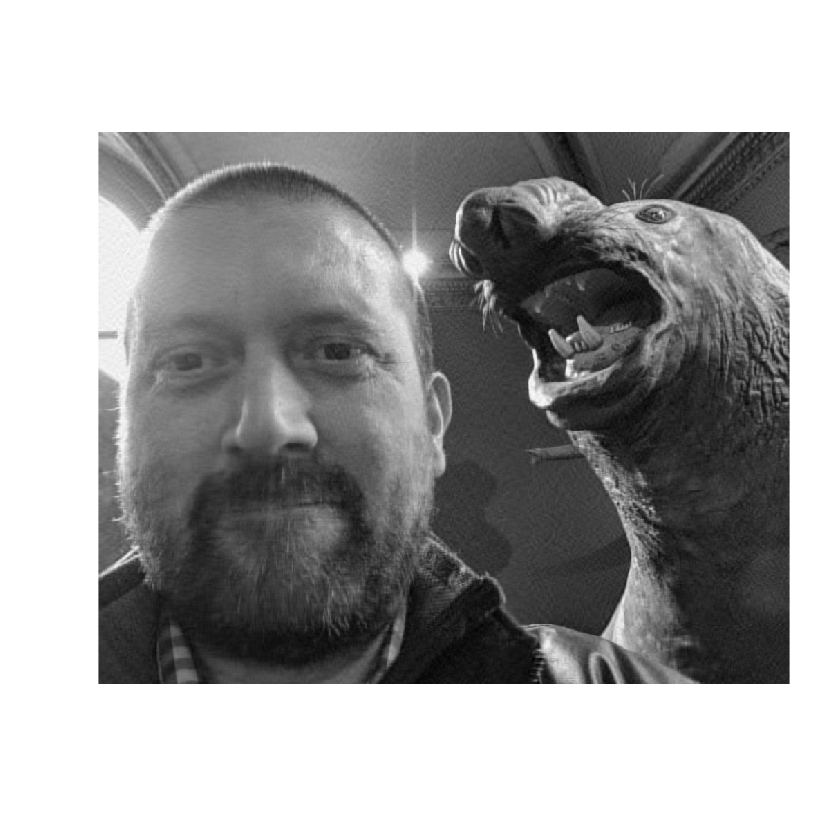

[1] 28.14063

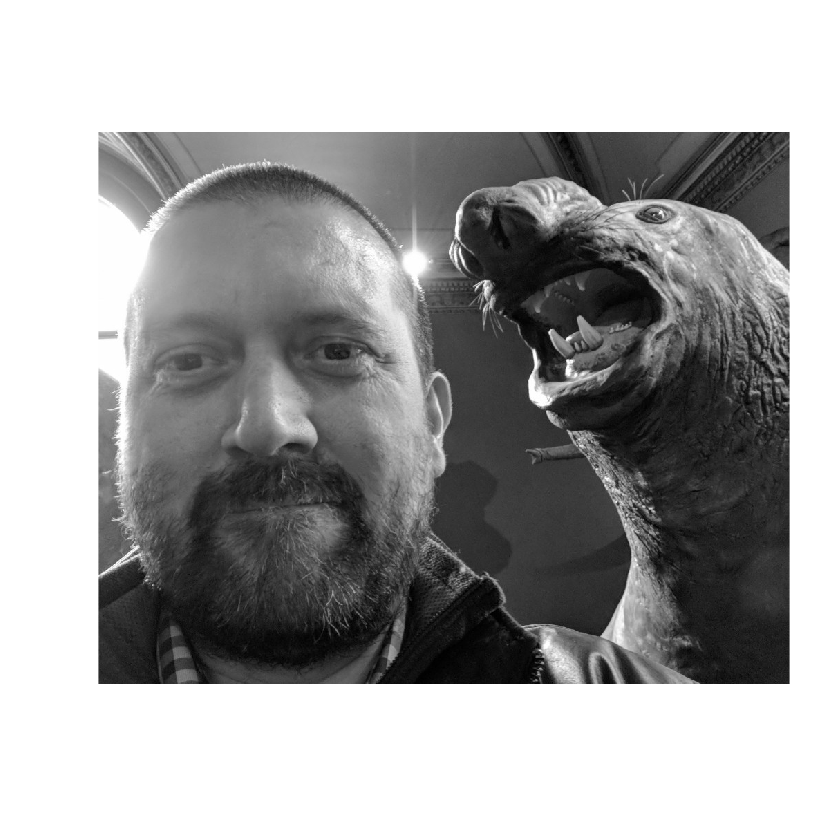

In [70]:
new_image = my_image_g
M_tmp = compress_image(M.svd, 100)
new_image@grey = M_tmp$img
plot(new_image)
plot(my_image_g)
M_tmp$pct_of_original

In [16]:
#M.svd$d